In [1]:
# import relevent libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
palette = ["blue", "green", "red", "orange"]  
# Set the global palette
sns.set_palette(palette)
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
sales = pd.read_csv('Salesdata.csv')
store = pd.read_csv('store.csv')
sales.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1
5,6,5,31-07-2015,5651,589,1,1,0,1
6,7,5,31-07-2015,15344,1414,1,1,0,1
7,8,5,31-07-2015,8492,833,1,1,0,1
8,9,5,31-07-2015,8565,687,1,1,0,1
9,10,5,31-07-2015,7185,681,1,1,0,1


In [3]:
store.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [4]:
sales['Store'].value_counts()

1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64

In [5]:
# Now lets merge the sales and store dataset based on store id

df = pd.merge(sales,store,on='Store')
df.shape

(1017209, 18)

In [6]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,30-07-2015,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,29-07-2015,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,28-07-2015,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,27-07-2015,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


## Exploratory Data Analysis

In [7]:
df.isna().sum()/df.shape[0]

Store                        0.000000
DayOfWeek                    0.000000
Date                         0.000000
Sales                        0.000000
Customers                    0.000000
Open                         0.000000
Promo                        0.000000
StateHoliday                 0.000000
SchoolHoliday                0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002597
CompetitionOpenSinceMonth    0.317878
CompetitionOpenSinceYear     0.317878
Promo2                       0.000000
Promo2SinceWeek              0.499436
Promo2SinceYear              0.499436
PromoInterval                0.499436
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

<AxesSubplot:xlabel='CompetitionDistance'>

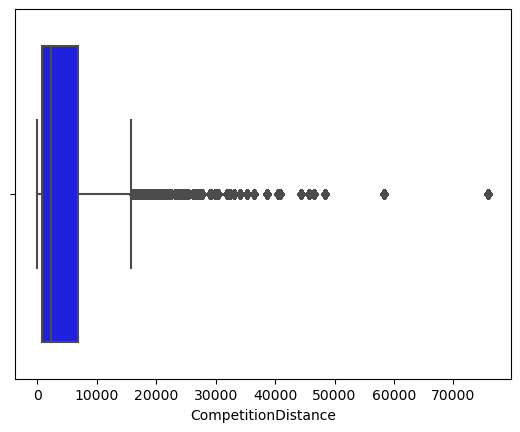

In [9]:
sns.boxplot(df['CompetitionDistance'])

<AxesSubplot:xlabel='CompetitionOpenSinceMonth'>

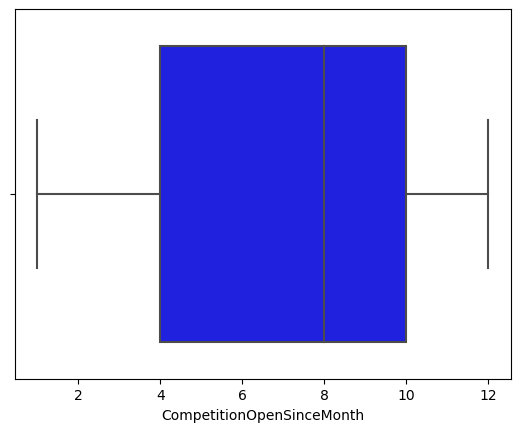

In [10]:
sns.boxplot(df['CompetitionOpenSinceMonth'])

<AxesSubplot:xlabel='CompetitionOpenSinceYear'>

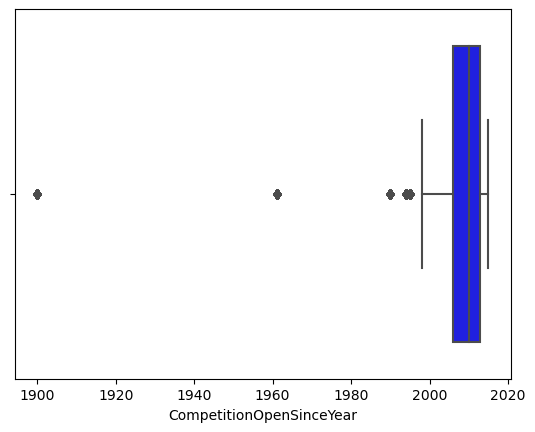

In [11]:
sns.boxplot(df['CompetitionOpenSinceYear'])

In [12]:
# since the data is skewed, it's better to impute these values with median than mean

df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True)
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].median(), inplace = True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].median(), inplace = True)

In [13]:
promo = df.loc[df['Promo2SinceWeek'].isna(),['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear','PromoInterval']]
promo

,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,NaN,NaN,NaN
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
...,...,...,...,...
1016262,0,NaN,NaN,NaN
1016263,0,NaN,NaN,NaN
1016264,0,NaN,NaN,NaN
1016265,0,NaN,NaN,NaN


In [14]:
promo['Promo2'].value_counts()

0    508031
Name: Promo2, dtype: int64

In [15]:
# Understanding the above finding that the all the missing values from other 3 column are because of the promo2 is 0
# so it is better to impute these NaN values with 0

df.Promo2SinceWeek.fillna(0,inplace=True)
df.Promo2SinceYear.fillna(0,inplace=True)
df.PromoInterval.fillna(0,inplace=True)

In [16]:
(df.isna().sum()/df.shape[0])*100

Store                        0.0
DayOfWeek                    0.0
Date                         0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

In [17]:
df.shape

(1017209, 18)

In [18]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

Text(0.5, 1.0, 'Sales vs Customers')

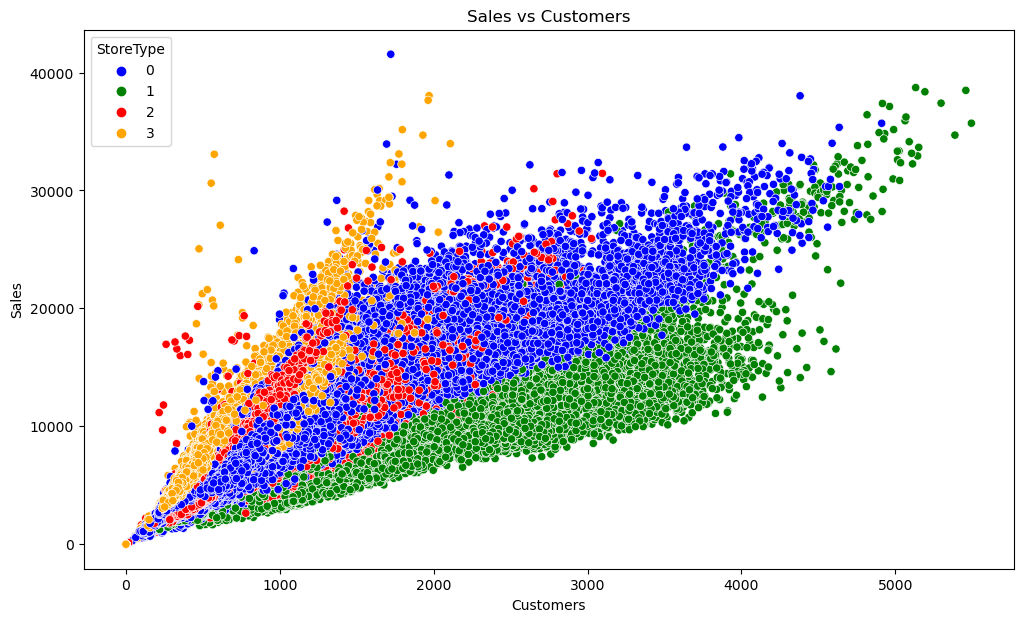

In [92]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df['Customers'], y=df['Sales'],hue=df['StoreType'],palette = ["blue", "green", "red", "orange"])
plt.title('Sales vs Customers')

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

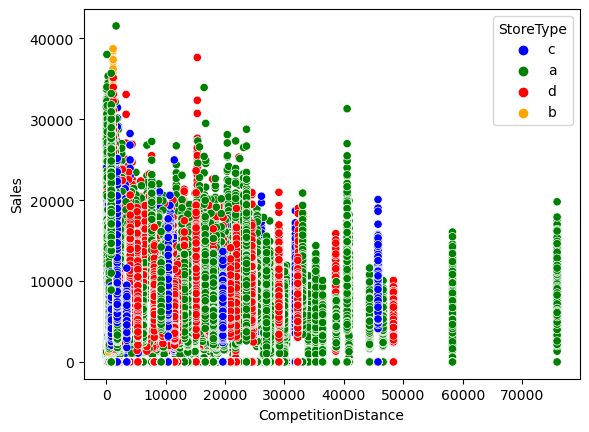

In [20]:
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'],hue=df['StoreType'])

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

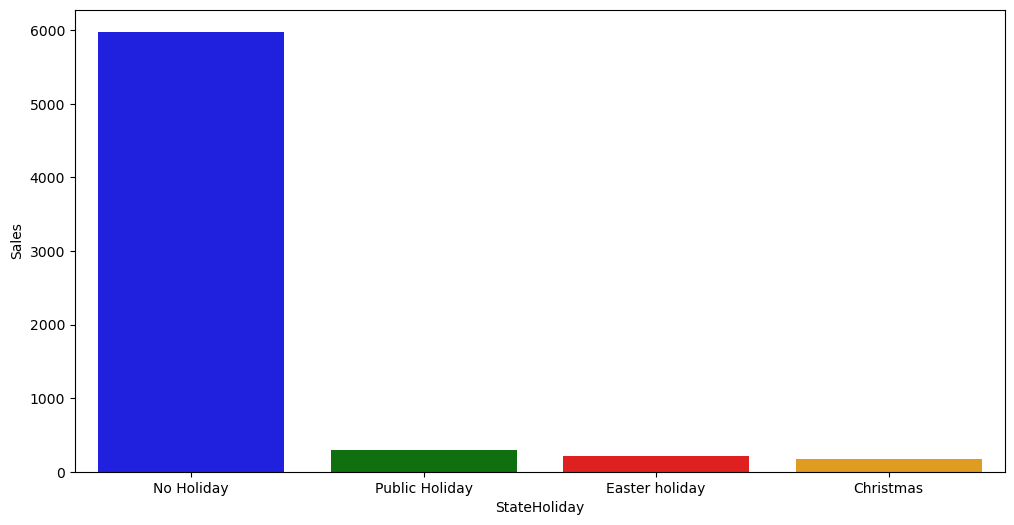

In [21]:
plt.figure(figsize=(12,6))
StateHoliday_df = df.groupby("StateHoliday")["Sales"].mean().to_frame().reset_index()
StateHoliday_df["StateHoliday"] = StateHoliday_df["StateHoliday"].map({'0':'No Holiday','a':'Public Holiday','b':'Easter holiday','c':'Christmas'})
sns.barplot(x=StateHoliday_df['StateHoliday'],y=StateHoliday_df['Sales'])

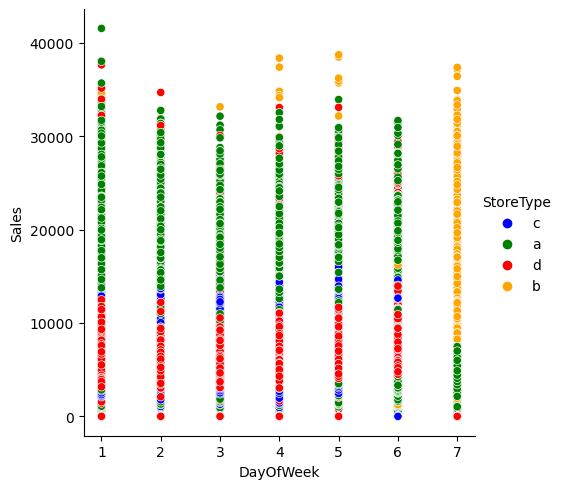

In [22]:
sns.relplot(x=df['DayOfWeek'],y=df['Sales'],hue=df['StoreType'],palette=palette)

In [23]:
df_store = df.copy()

df_store['SalesperCustomer']=df_store['Sales']/df_store['Customers']

Text(0.5, 1.0, 'Average Spending per Customer in each Store Type \n Fig 1.6')

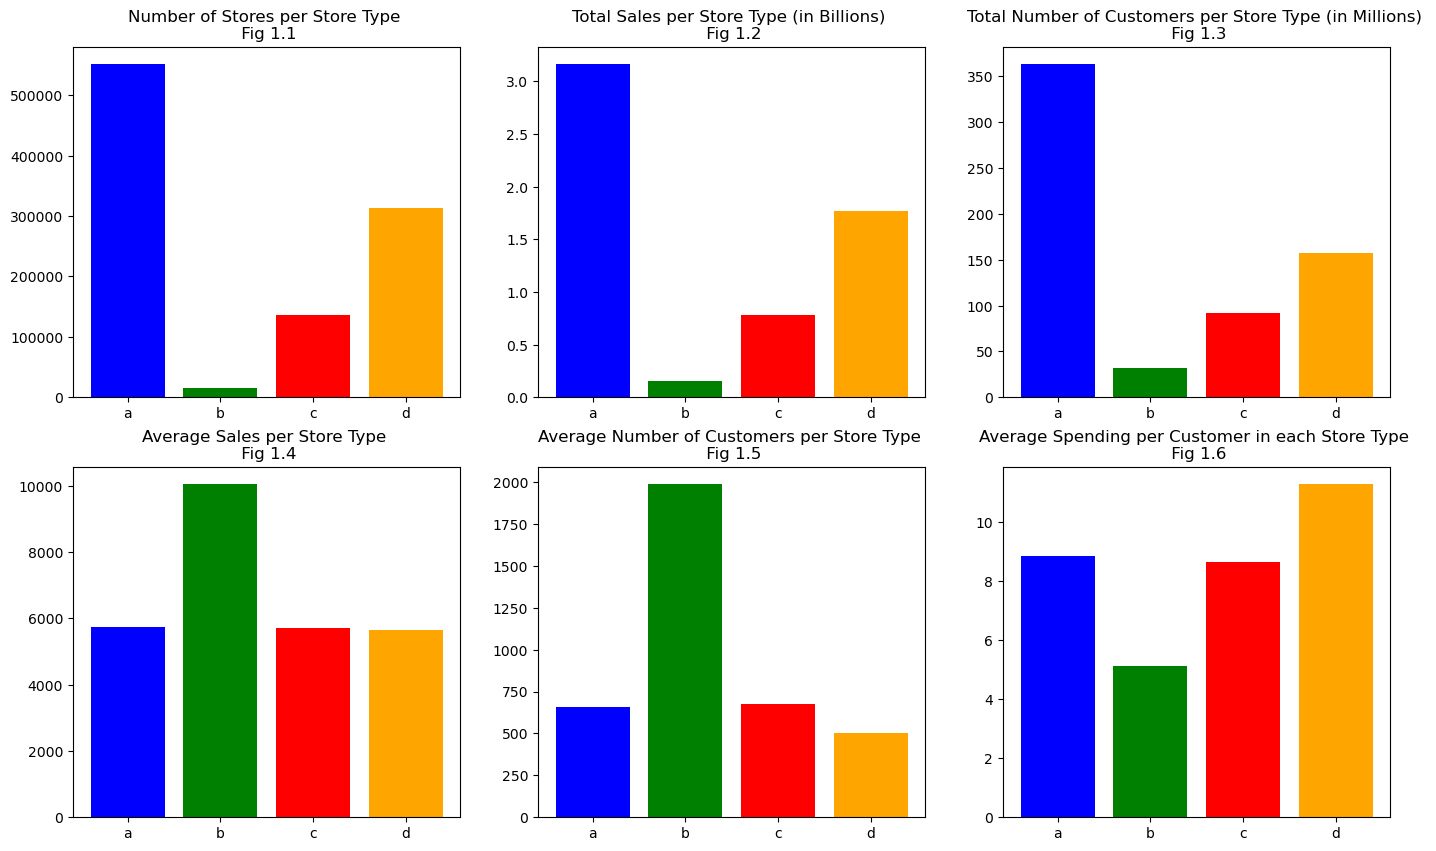

In [24]:
fig, axes = plt.subplots(2, 3,figsize=(17,10) )

axes[0,0].bar(df_store.groupby(by="StoreType").count().Store.index,df_store.groupby(by="StoreType").count().Store,color=palette)
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(df_store.groupby(by="StoreType").sum().Sales.index,df_store.groupby(by="StoreType").sum().Sales/1e9,color=palette)
axes[0,1].set_title("Total Sales per Store Type (in Billions) \n Fig 1.2")
axes[0,2].bar(df_store.groupby(by="StoreType").sum().Customers.index,df_store.groupby(by="StoreType").sum().Customers/1e6,color=palette)
axes[0,2].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,0].bar(df_store.groupby(by="StoreType").sum().Customers.index,df_store.groupby(by="StoreType").Sales.mean(),color=palette)
axes[1,0].set_title("Average Sales per Store Type \n Fig 1.4")
axes[1,1].bar(df_store.groupby(by="StoreType").sum().Customers.index,df_store.groupby(by="StoreType").Customers.mean(),color=palette)
axes[1,1].set_title("Average Number of Customers per Store Type \n Fig 1.5")
axes[1,2].bar(df_store.groupby(by="StoreType").sum().Sales.index,df_store.groupby(by="StoreType").SalesperCustomer.mean(),color=palette)
axes[1,2].set_title("Average Spending per Customer in each Store Type \n Fig 1.6")


<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

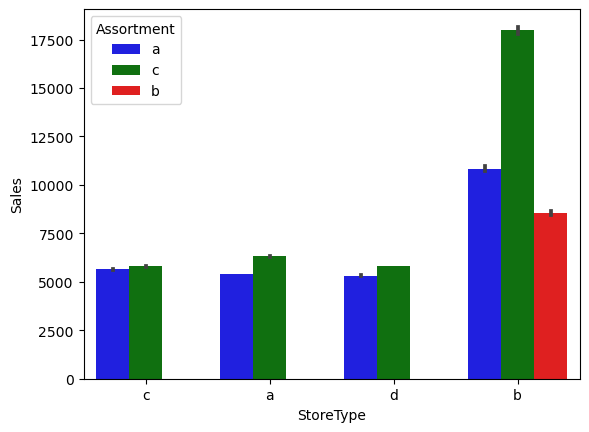

In [25]:
sns.barplot(x=df['StoreType'], y=df['Sales'],hue=df['Assortment'])

<AxesSubplot:xlabel='StoreType', ylabel='count'>

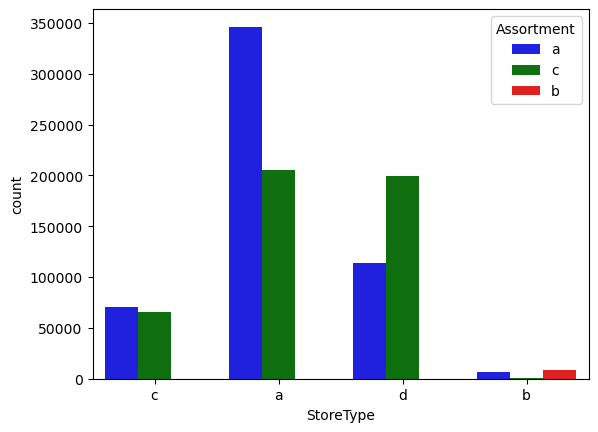

In [26]:
sns.countplot(x=df['StoreType'],hue=df['Assortment'])

In [27]:
df['Date'] = pd.to_datetime(df['Date'])
# Extracting year, month and Day from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop('Date',axis=1,inplace=True)

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

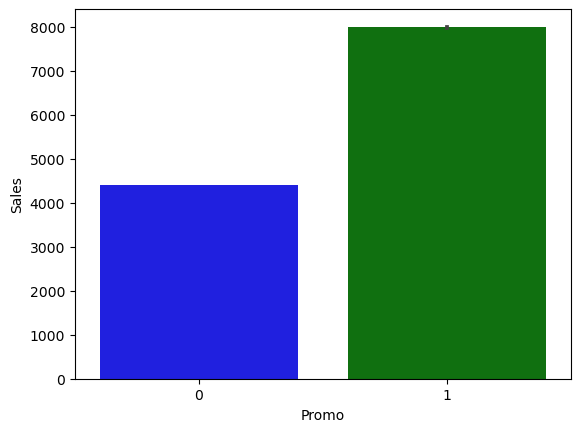

In [28]:
sns.barplot(x=df['Promo'], y=df['Sales'])

In [29]:
df_store['Sales'] = df_store[df_store['Sales']>0]['Sales']

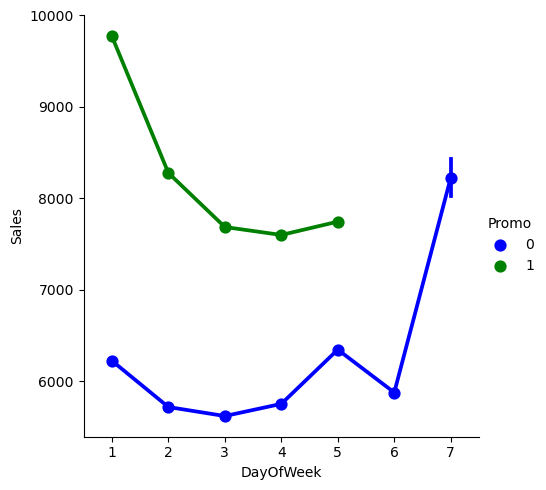

In [30]:
sns.factorplot(data = df_store, x ="DayOfWeek", y = "Sales",
                hue='Promo'
              ,sharex=False)

In [31]:
print ("Number of Stores opened on Sundays:{}" .format(df_store[(df_store.Open == 1) & (df_store.DayOfWeek == 7)]['Store'].unique().shape[0]))

Number of Stores opened on Sundays:33


Text(0.5, 1.0, 'Correlation Matrix')

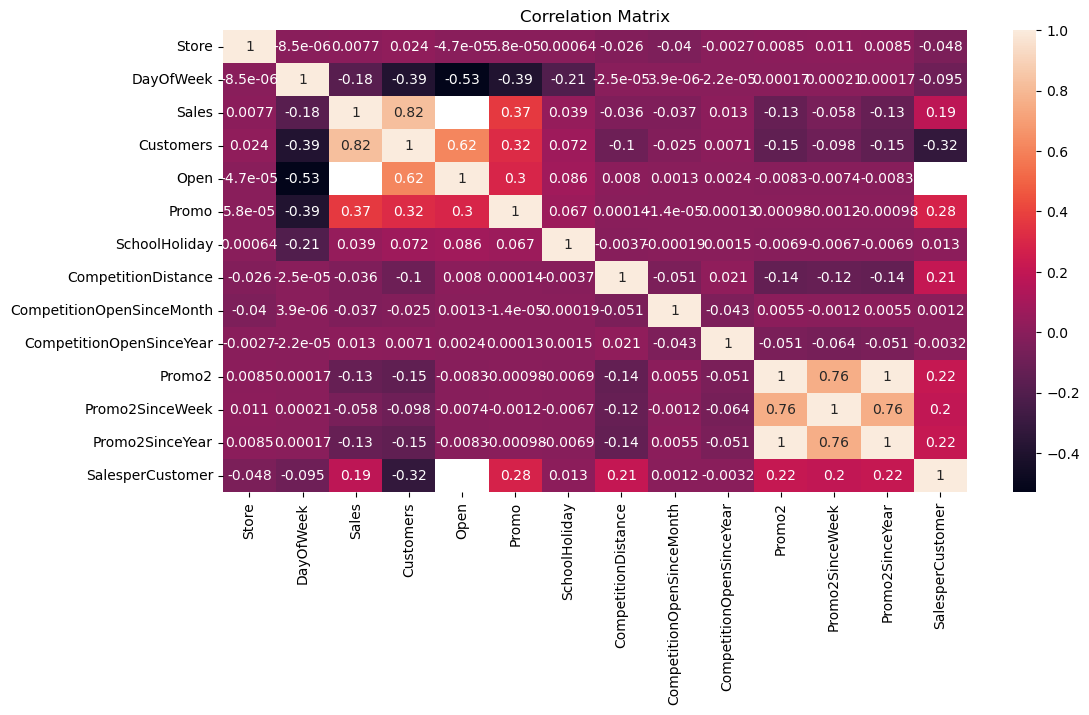

In [32]:
correlation_matrix = df_store.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")

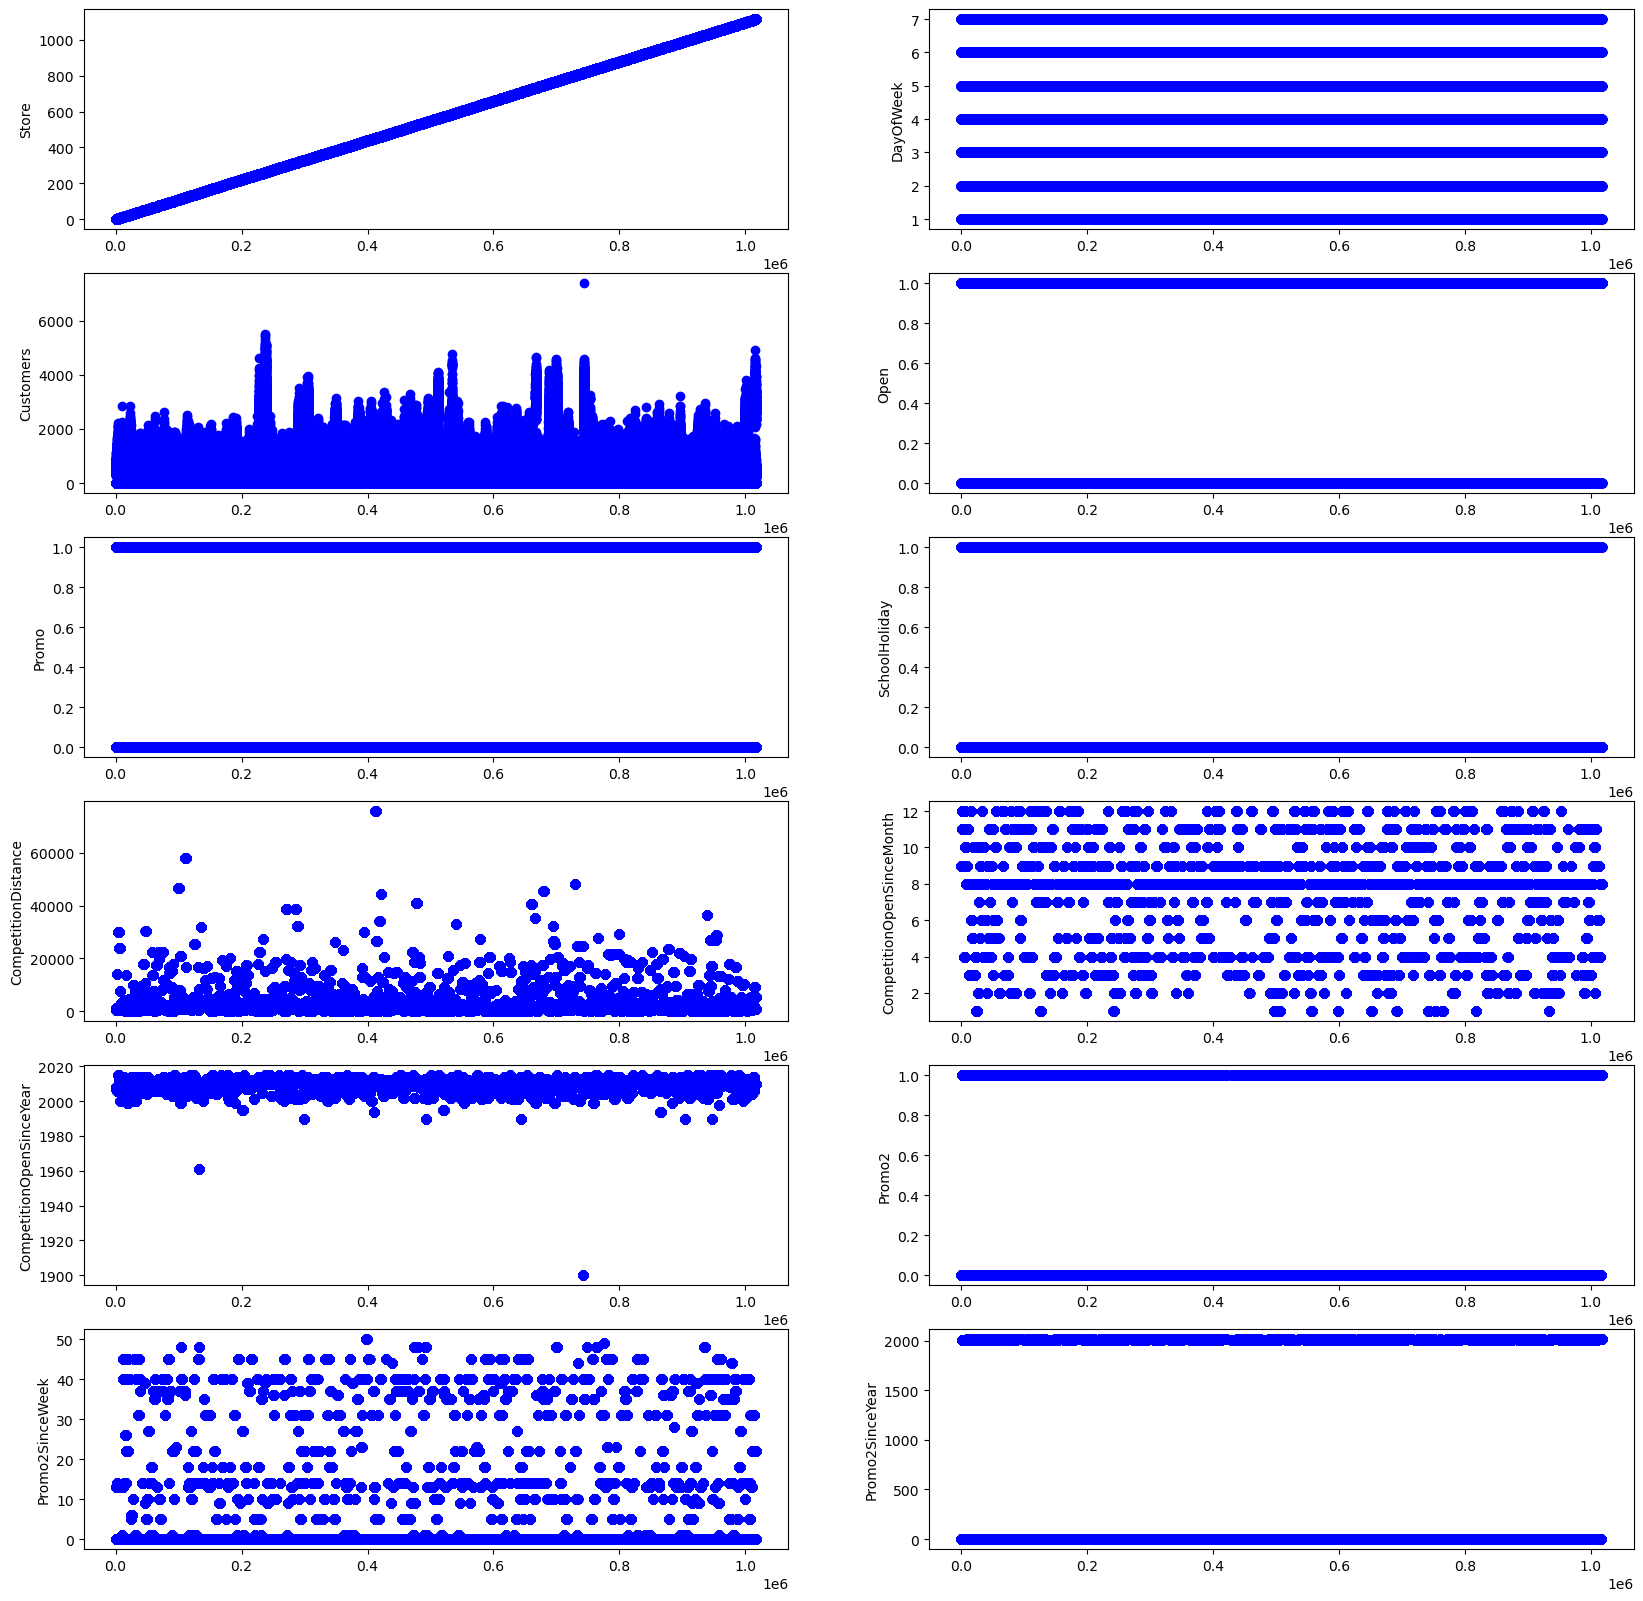

In [33]:
numeric_col = df.select_dtypes(include=np.number) #gets only numeric columns
column_names = list(numeric_col)
column_names.remove('Sales')
col_index = 0

rows = 6
col = 2

fig , ax = plt.subplots(nrows=rows,ncols=col,figsize=[20,20])

for row_count in range(rows):
    for col_count in range(col):
        ax[row_count][col_count].scatter(y=df[column_names[col_index]],x=numeric_col.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index += 1


In [34]:
df[df['Customers']>6000].index

Int64Index([744384], dtype='int64')

In [35]:
#lets remove the row as it is only one
df.drop(df[df['Customers']>6000].index[0],inplace=True)

In [36]:
#capping CompetitionDistance to 40000
df.loc[df['CompetitionDistance']>40000,['CompetitionDistance']] = 40000

In [37]:
df[df['CompetitionOpenSinceYear']<1980].index

Int64Index([131622, 131623, 131624, 131625, 131626, 131627, 131628, 131629,
            131630, 131631,
            ...
            742512, 742513, 742514, 742515, 742516, 742517, 742518, 742519,
            742520, 742521],
           dtype='int64', length=1700)

In [38]:
#lets cap the CompetitionOpenSinceYear to the lower range as 1980
df.loc[df['CompetitionOpenSinceYear']<1980,['CompetitionOpenSinceYear']] = 1980

In [39]:
df.nunique()

Store                         1115
DayOfWeek                        7
Sales                        21733
Customers                     4085
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            647
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        22
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
Year                             3
Month                           12
Day                             31
dtype: int64

In [40]:
df.StateHoliday.value_counts()

0    855086
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [41]:
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [42]:
df['StateHoliday'].replace({0: '0'}, inplace=True)

In [43]:
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [44]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


In [45]:
df.loc[df['Sales']<=0,['Sales','Open']]

,Sales,Open
5,0,0
12,0,0
19,0,0
26,0,0
33,0,0
...,...,...
1017182,0,0
1017189,0,0
1017196,0,0
1017203,0,0


In [46]:
df.Sales.value_counts()

0        172871
5674        215
5558        197
5483        196
6049        195
          ...  
20987         1
26862         1
21622         1
18714         1
21237         1
Name: Sales, Length: 21733, dtype: int64

In [47]:
df.Open.value_counts()

1    844391
0    172817
Name: Open, dtype: int64

In [48]:
df.shape

(1017208, 20)

In [49]:
df.PromoInterval.value_counts()

0                   508030
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64

In [50]:
m2={0:"0","Jan,Apr,Jul,Oct":"Jan,Apr,Jul,Oct","Feb,May,Aug,Nov":"Feb,May,Aug,Nov","Mar,Jun,Sept,Dec":"Mar,Jun,Sept,Dec"}
df["PromoInterval"]=df["PromoInterval"].map(m2)

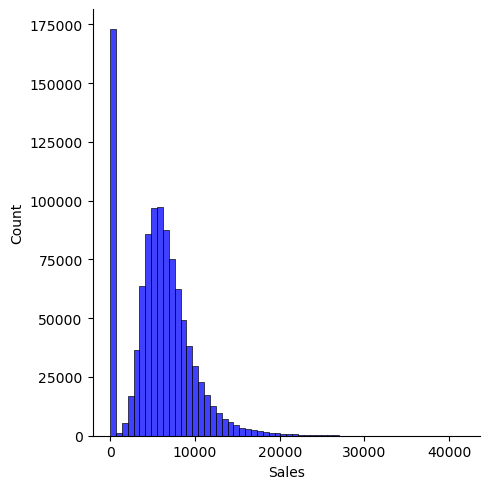

In [51]:
sns.displot(df,x='Sales',bins=60)

In [52]:
df['DayOfWeek'].nunique()

7

In [53]:
df['Promo'].nunique()

2

In [54]:
df['Promo2'].nunique()

2

In [55]:
df['Open'].nunique()

2

In [56]:
#df.drop('Open',axis=1,inplace=True)

In [57]:
df['SchoolHoliday'].nunique()

2

In [58]:
df['StoreType'].nunique()

4

In [59]:
# since promo2, promo2sinceweek and promo2sinceyear are highly correlated, we use only promo2
df.drop(['Promo2SinceWeek','Promo2SinceYear'],axis=1,inplace=True)

In [60]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'PromoInterval', 'Year', 'Month',
       'Day'],
      dtype='object')

In [61]:
num_c=["Customers","CompetitionDistance","CompetitionOpen","PromoOpen",] # numerical
cat_c=["DayOfWeek","StateHoliday","SchoolHoliday", "StoreType","Assortment","Promo","Promo2","Month","Year","PromoInterval"] # category


### Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder

# encoding
df[cat_c]=df[cat_c].astype("object")
le=LabelEncoder()
df.update(df[cat_c].apply(le.fit_transform))
df.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,PromoInterval,Year,Month,Day
0,1,4,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0,2,6,31
1,1,3,5020,546,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0,2,6,30
2,1,2,4782,523,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0,2,6,29
3,1,1,5011,560,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0,2,6,28
4,1,0,6102,612,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0,2,6,27


### Train Test Split

In [63]:
cols=df.columns.tolist()
cols.remove("Sales")
cols

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'PromoInterval',
 'Year',
 'Month',
 'Day']

In [64]:
y=df["Sales"]
x=df.drop("Sales",axis=1)

In [65]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=13)
x_train.shape

(813766, 17)

In [66]:
x_train.shape

(813766, 17)

In [67]:
type(x_train)

pandas.core.frame.DataFrame

### Scaling the features

In [68]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(x_train)
x_train[cols] = scale.transform(x_train)
x_train.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,PromoInterval,Year,Month,Day
649109,0.480411,1.003108,3.048471,0.451931,-0.785722,-0.159121,-0.466515,-0.883783,1.072291,-0.707325,0.197138,0.209198,0.998819,0.942966,-1.070598,-0.917406,1.609138
799482,0.989744,0.502271,0.420948,0.451931,1.272715,-0.159121,-0.466515,-0.883783,1.072291,3.288577,0.197138,0.209198,-1.001183,-0.906221,-1.070598,-0.032830,-0.379100
432151,-0.261848,1.503946,-1.363013,-2.212729,-0.785722,-0.159121,-0.466515,0.581035,-0.940337,1.305109,0.197138,0.209198,0.998819,1.867559,1.501531,1.441463,-1.594134
536275,0.092200,-1.000241,0.068029,0.451931,-0.785722,-0.159121,-0.466515,1.313444,1.072291,1.430627,-1.672313,0.209198,-1.001183,-0.906221,-1.070598,-0.327689,0.615019
53123,-1.550709,1.503946,-1.363013,-2.212729,-0.785722,-0.159121,-0.466515,-0.883783,1.072291,-0.345942,-0.550643,-0.559247,0.998819,0.942966,0.215467,0.262028,-0.710473


In [69]:
# scale the test data as well
x_test[cols]=scale.transform(x_test)
x_test.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,PromoInterval,Year,Month,Day
267850,-0.817766,1.503946,-1.363013,-2.212729,-0.785722,-0.159121,-0.466515,-0.883783,-0.940337,-0.708704,1.318808,-2.352287,0.998819,1.867559,-1.070598,-0.622548,-0.158184
185631,-1.094173,-0.499404,0.380061,0.451931,-0.785722,-0.159121,-0.466515,-0.883783,1.072291,-0.685256,0.197138,0.209198,0.998819,0.942966,1.501531,-0.327689,1.277765
962845,1.545662,-1.000241,-0.510844,0.451931,1.272715,-0.159121,-0.466515,1.313444,1.072291,0.000268,0.197138,0.209198,0.998819,0.942966,0.215467,-0.917406,0.283646
235479,-0.929571,-1.501079,-1.363013,-2.212729,1.272715,-0.159121,-0.466515,-0.151374,0.065977,-0.708704,0.197138,0.209198,-1.001183,-0.906221,-1.070598,-0.622548,-1.483676
655668,0.505257,1.003108,0.795386,0.451931,-0.785722,-0.159121,-0.466515,-0.883783,1.072291,-0.242493,0.571028,0.721495,0.998819,1.867559,0.215467,1.441463,1.498680


## Model Building

In [70]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [71]:
y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)

In [72]:
from sklearn import metrics as mt

def score(y,y_pred):
    r2 = mt.r2_score(y,y_pred)
    mse = mt.mean_squared_error(y,y_pred)
    rmse = np.sqrt(mse)
    mae = mt.mean_absolute_error(y,y_pred)
    
    # Print the calculated metrics
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.4f}")

In [73]:
score(y_train,y_train_pred)

Mean Squared Error: 0.00
Root Mean Squared Error: 0.00
Mean Absolute Error: 0.00
R-squared: 1.0000


In [74]:
score(y_test,y_test_pred)

Mean Squared Error: 408405.14
Root Mean Squared Error: 639.07
Mean Absolute Error: 381.00
R-squared: 0.9725


In [75]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

y_test_pred = lr.predict(x_test)


In [76]:
score(y_test,y_test_pred)

Mean Squared Error: 1956366.52
Root Mean Squared Error: 1398.70
Mean Absolute Error: 947.58
R-squared: 0.8683


In [77]:
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV,cross_validate
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor

In [78]:
def modelBuilding(models,regressor):
    for i,j in zip(models,regressor):
        j.fit(x_train,y_train)
        y_test_pred = j.predict(x_test)
        print("############# {} ##############".format(i))
        score(y_test,y_test_pred)
    

In [79]:
models=["BaggingRegressor","RandomForestRegressor","GradientBoostingRegressor"]
regresions=[BaggingRegressor(random_state=0),RandomForestRegressor(random_state=0),GradientBoostingRegressor(random_state=0)]
 
modelBuilding(models,regresions)

############# BaggingRegressor ##############
Mean Squared Error: 224956.14
Root Mean Squared Error: 474.30
Mean Absolute Error: 288.08
R-squared: 0.9849
############# RandomForestRegressor ##############
Mean Squared Error: 200522.21
Root Mean Squared Error: 447.80
Mean Absolute Error: 271.92
R-squared: 0.9865
############# GradientBoostingRegressor ##############
Mean Squared Error: 974499.34
Root Mean Squared Error: 987.17
Mean Absolute Error: 681.70
R-squared: 0.9344


### HyperParameter Tuning

In [80]:
 models=["RandomForestRegressor","GradientBoostingRegressor"]
regresions=[RandomForestRegressor(random_state=0),GradientBoostingRegressor(random_state=0)]
# For hiperparameter tuning
params={
    models[0]:{"max_depth":np.arange(2,10,3),"max_features":np.arange(2,10,3),"n_estimators":np.arange(5,26,5)},
    models[1]:{"learning_rate":[0.001,0.01],"n_estimators":np.arange(2,10,3),"min_samples_split":np.arange(2,10,3),"max_depth":np.arange(2,10,3)}
}

In [81]:
def solution(model):
    model.fit(x_train,y_train)
    return model

def score(model2):
    y_pred=solution(model2).predict(x_test)
    r2=mt.r2_score(y_test,y_pred)
    mae = mt.mean_absolute_error(y_test,y_pred)
    mse=mt.mean_squared_error(y_test,y_pred,squared=True)
    return [r2,mae,mse]

In [82]:
for i,j in zip(models,regresions):
    print(i)
    grid=GridSearchCV(solution(j),params[i],cv=3)
    grid.fit(x_train,y_train)
    print(grid.best_params_)

RandomForestRegressor
{'max_depth': 8, 'max_features': 8, 'n_estimators': 25}
GradientBoostingRegressor
{'learning_rate': 0.01, 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 8}


In [84]:
models2=["DecisionTree","LinearRegression","BaggingRegressor","RandomForestRegressor No optimization","GradientBoostingRegressor No optimization","RandomForestRegressor","GradientBoostingRegressor"]
regression2=[DecisionTreeRegressor(),LinearRegression(),BaggingRegressor(random_state=0),RandomForestRegressor(random_state=0),GradientBoostingRegressor(random_state=0),
             RandomForestRegressor(random_state=0,max_depth=8,max_features=8,n_estimators=20),
             GradientBoostingRegressor(random_state=0,learning_rate=0.01,max_depth=8,min_samples_split=8,n_estimators=8)]

results=[]
for i in regression2:
    results.append(score(i))

In [85]:
res=pd.DataFrame(models2,columns=["Model Name"])
res["Results(R2_score,MAE,MSE)"]=results
res

,Model Name,"Results(R2_score,MAE,MSE)"
0,DecisionTree,"[0.9728912062113778, 380.50919180896767, 40270..."
1,LinearRegression,"[0.8683021571829355, 947.575602518911, 1956366..."
2,BaggingRegressor,"[0.984856499140777, 288.0792294609766, 224956...."
3,RandomForestRegressor No optimization,"[0.9865013317329688, 271.9225756726733, 200522..."
4,GradientBoostingRegressor No optimization,"[0.9343990711567943, 681.698649410063, 974499...."
5,RandomForestRegressor,"[0.9197317577693447, 723.9178479900587, 119238..."
6,GradientBoostingRegressor,"[0.13642661881901186, 2692.2665320161905, 1282..."


In [86]:
print(res.to_string(index=False, max_rows=None, max_colwidth=None))

                               Model Name                                     Results(R2_score,MAE,MSE)
                             DecisionTree   [0.9728912062113778, 380.50919180896767, 402700.1156742462]
                         LinearRegression     [0.8683021571829355, 947.575602518911, 1956366.518924192]
                         BaggingRegressor    [0.984856499140777, 288.0792294609766, 224956.13767520967]
    RandomForestRegressor No optimization   [0.9865013317329688, 271.9225756726733, 200522.21116762617]
GradientBoostingRegressor No optimization     [0.9343990711567943, 681.698649410063, 974499.3391990962]
                    RandomForestRegressor   [0.9197317577693447, 723.9178479900587, 1192381.7298289374]
                GradientBoostingRegressor [0.13642661881901186, 2692.2665320161905, 12828350.210135214]


In [87]:
rfmodel=RandomForestRegressor(random_state=0)
rfmodel.fit(x_train,y_train)
rfpredict=rfmodel.predict(x_test)

In [88]:
print(f"Mean Squared Error: {mt.mean_squared_error(y_test,rfpredict):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mt.mean_squared_error(y_test,rfpredict)):.2f}")
print(f"Mean Absolute Error: {mt.mean_absolute_error(y_test,rfpredict):.2f}")
print(f"R-squared: {mt.r2_score(y_test,rfpredict):.4f}")

Mean Squared Error: 200522.21
Root Mean Squared Error: 447.80
Mean Absolute Error: 271.92
R-squared: 0.9865


In [89]:
r2 = mt.r2_score(y_test,rfpredict)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - len(x_test.T[1:]))

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.9865003363831905


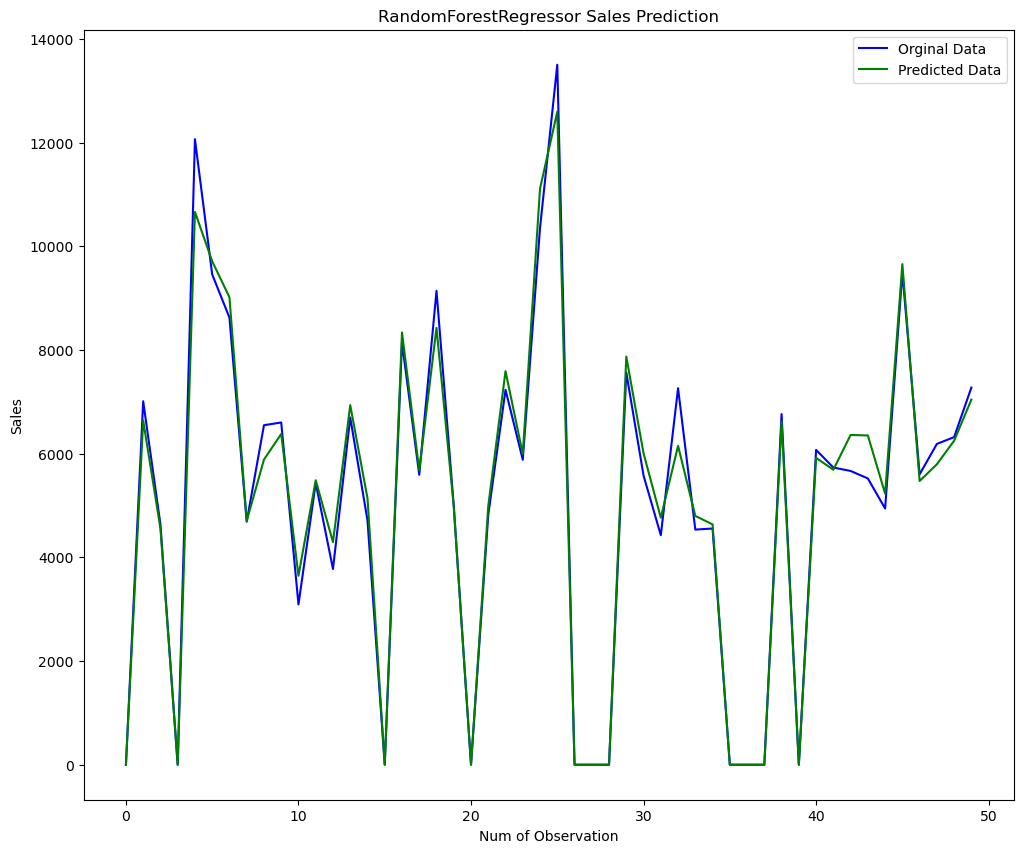

In [95]:
plt.figure(figsize=(12,10))
plt.plot(range(len(y_test[:50])),y_test[:50],label="Orginal Data")
plt.plot(range(len(y_test[:50])),rfpredict[:50],label="Predicted Data")
plt.title("RandomForestRegressor Sales Prediction")
plt.ylabel("Sales")
plt.xlabel("Num of Observation")
plt.legend()
plt.savefig("RandomForestRegressor.png", format='png', dpi=300, bbox_inches='tight')

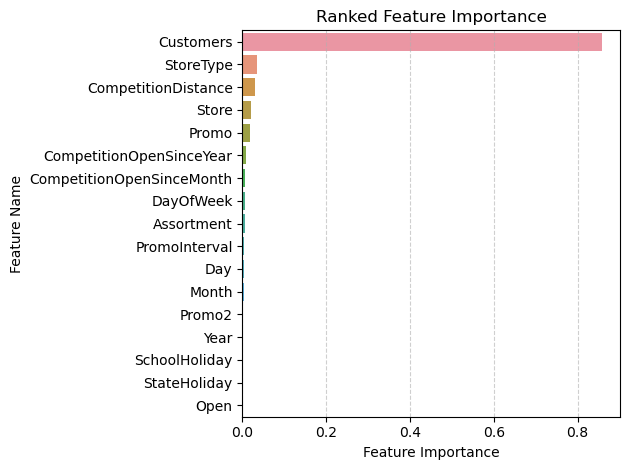

In [94]:
importances = rfmodel.feature_importances_

feature_df = pd.DataFrame({'feature': x_train.columns, 'importance': importances})
feature_df = feature_df.sort_values(by='importance', ascending=False)  # Sort by descending importance

sns.barplot(x='importance', y='feature', data=feature_df)  # Feature on y, importance on x
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Ranked Feature Importance")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("Feature Importance.png", format='png', dpi=300, bbox_inches='tight')